<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Инструкция по выполнению проекта

Загрузите и изучите данные.  
Ответьте на вопрос и обоснуйте решение.   
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
 a. Изменится. Приведите примеры матриц.  
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.  
Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.  
Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

## Загрузка данных

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 

In [ ]:
#plt.style.use('dark_background') #selectable

In [ ]:
try:
    df = pd.read_csv(
        'http://localhost:8888/edit/Desktop/Инф/Learning%20DS/projects/insurance/insurance.csv')
except:
    df = pd.read_csv(
        'https://code.s3.yandex.net/datasets/insurance.csv')

In [ ]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


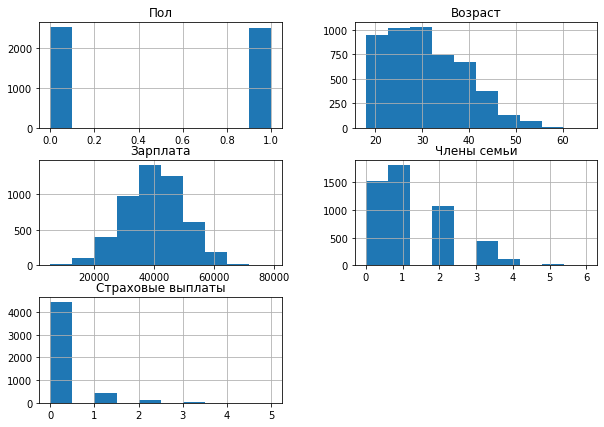

In [ ]:
df.hist(figsize=(10,7));

In [ ]:
df.duplicated().sum()

153

# Описание данных

**Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.  
**Целевой признак**: количество страховых выплат клиенту за последние 5 лет.

Данные в прекрасном состоянии, выглядят естественно. Встречающиеся дубликаты не вызывают подозрений. Выбросы отсутствуют, пропусков нет, нулей в неподходящих местах нет.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Обозначения:

- $a_1$ — предсказания с учетом умножения на обратимую матрицу

- $w_1$ — формула обучения с учетом умножения на обратимую матрицу

Предсказания с учетом умножения на обратимую матрицу
$$
a_1 = XPw_1
$$

Преобразуем формулу обучения

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Раскроем скобки

$$
w_1 = (X^T P^T XP)^{-1} X^T P^T y = (X^TX)^{-1} (P^T)^{-1} P^{-1} X^T P^T y
$$

Выражение $(P^T)^{-1} P^T$ приводит к единичной матрице, а умножение на нее в свою очередь приводит к исходной матрице, значит выражение $(P^T)^{-1} P^T$ можно убрать

$$
w_1 = (X^TX)^{-1} P^{-1} X^T y
$$

Так как $w = (X^T X)^{-1} X^T y$

$$
w_1 = P^{-1} w
$$

Перенесем полученое выражение в формулу предсказаний

$$
a_1 = XP P^{-1} w
$$

$$
a_1 = Xw
$$

$$
a_1 = a
$$



**Вывод:** Предсказания при умножении на обратимую матрицу равны предсказаниям без умножения на обратимую матрицу

In [ ]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [ ]:
model = LinearRegression()
score = cross_val_score(model,features,target)
final_score = pd.Series(score).mean()
print(f'original score: {final_score:.4f}')

original score: 0.4231


Согласно документации если не указать параметр scoring в методе cross_val_score, будет использована метрика по умолчанию. Метрикой по умолчанию для моделей регрессии является r2_score.

In [ ]:
temp = []
for i in range(1000):
    test = np.random.normal(-1000,1000,size=(4,4))
    try:
        np.linalg.inv(test)
        features_new = features.values@test
        model = LinearRegression()
        score = cross_val_score(model,features_new,target)
        final_score = pd.Series(score).mean()
        temp.append(final_score)
        if i < 10:
            print(f'test №{i+1}: {final_score:.4f}')
    except:
        continue
print(f'Среднее значение метрики: {pd.Series(temp).mean():.4f}')

test №1: 0.4231
test №2: 0.4231
test №3: 0.4231
test №4: 0.4231
test №5: 0.4231
test №6: 0.4231
test №7: 0.4231
test №8: 0.4231
test №9: 0.4231
test №10: 0.4231
Среднее значение метрики: 0.4231


**Ответ:** Качество линейной регрессии не изменится при умножении признаков на обратимую матрицу.

**Обоснование:** 
1. Приведено теоретическое доказательство показавшее что предсказания не изменяются при умножении на обратимую матрицу.
  
  
2. Был проведен эксперимент и повторен 1000 раз. Было посчитано значение метрики на оригинальных признаках, потом матрица оригинальных признаков умножалась на случайную обратимую матрицу, считалось значение метрики и находилось среднее значение из всех проведенных экспериментов. В результате было подтверждено совпадение значений метрик.

## Алгоритм преобразования

**Алгоритм**

Предлагаю использовать свойство обратимости матриц: шифровать признаки обратимой матрицей и дешифровать обратной ей

**Обоснование**

Как показали эксперименты такой подход не повлияет на качество линейной регрессии, а персональная информация о клиентах при этом будет хорошо защищена. При этом сохранится возможность дешифровки.

## Проверка алгоритма

In [ ]:
crypt_matrix = np.random.randint(-1000,1000,size=(4,4))  
uncript_matrix = np.linalg.inv(crypt_matrix)
display("Обычные признаки",features.head(3))
crypted_feautures = features.values @ crypt_matrix
display("Зашифрованные признаки",pd.DataFrame(crypted_feautures,columns=df.columns[:4]).head(3))
uncrypted_features = crypted_feautures @ uncript_matrix
display("Расшифрованные признаки",pd.DataFrame(uncrypted_features, columns=df.columns[:4]).head(3))

'Обычные признаки'

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0


'Зашифрованные признаки'

,Пол,Возраст,Зарплата,Члены семьи
0,46435426.0,-45272620.0,-22380983.0,798502.0
1,35579094.0,-34679659.0,-17132786.0,613875.0
2,19663366.0,-19164271.0,-9465088.0,339857.0


'Расшифрованные признаки'

,Пол,Возраст,Зарплата,Члены семьи
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-9.546988e-12,46.0,38000.0,1.000000e+00
2,-3.138809e-12,29.0,21000.0,-4.870522e-13


## Вывод
Проведенные эксперименты показали: преобразование данных путем умножения на обратимую матрицу не вредит качеству линейной регрессии, а также защищает персональную информацию клиентов, сохраняя возможность обратной дешифровки.